# Homework 3 Solution

**MECH.5130: Theory of Finite Element Analysis**

Michael N. Olaya

## Problem 1

### Unit tests

Unit tests were designed for:

- Shape function matrix verification (N)
- Shape function derivative matrix verification (dN)
- Full Jacobian matrix verification (J)
- B matrix verification (B)
- Visual inspection of (in both the local element and natural coordinate systems)...
    - Element shape functions
    - Element displacements
    - Element Jacobian
    - Element strains
    - Element stresses

For unit test implementations, refer to [`tests.py`](../../mfe/tests.py). Specific checks and their pass/fail status are printed to the console once invoked as demonstrated in the code blocks below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mfe.plot
import mfe.utils
import mfe.tests
from mfe.baseclasses import Material
from mfe.elem_lib import Linear2D, Quadratic2D

In [2]:
ELEMENTS = {
    'linear': {
        'elem': Linear2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([12, -1]), 
                np.array([15, 8]), 
                np.array([-1, 10])]
        ),
        'q': np.array([0, 0, 0.1, -0.1, 0.1, 0.1, -0.1, 0.1])
    },
    'quad': {
        'elem': Quadratic2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([6, 0.5]), 
                np.array([12, -1]),
                np.array([11, 5]),
                np.array([15, 8]),
                np.array([6, 11]),
                np.array([-1, 10]),
                np.array([1, 5]),
            ]
        ),
        'q': np.array([0, 0, 0.1, -0.1, 0.2, -0.3, 0.2, -0.3, 0.2, -0.3, 0.1, -0.1, 0.0, 0.1, 0.0, 0.0])
    },
}
MATERIALS = {
    'aluminum': Material(E=70000, nu=0.33)
}
NGRID = 50

#### 4-noded, 2D element

In [3]:
# Get element and run all tests
elem = ELEMENTS['linear']['elem']
q = ELEMENTS['linear']['q']
mfe.tests.test_2D_shape_functions(elem, NGRID)
mfe.tests.test_2D_shape_function_derivatives(elem, NGRID)
mfe.tests.test_2D_jacobian(elem, NGRID)
mfe.tests.test_2D_B_matrix(elem, NGRID)

*running test: 2D shape function (N) verification
-checking: shape of N matrix
-checking: sum of shape functions
-checking: N matrix zero-valued elements
-checking: N matrix components equivalence with corresponding nodal shape function
-checking: N matrix row equivalence
**test passed: shape function matrix (N)

*running test: 2D shape function derivative matrix (dN) verification
-checking: shape of dN matrix
-checking: sum of shape function derivatives
-checking: dN matrix zero-valued elements
-checking: dN matrix components equivalence with corresponding nodal shape function derivatives in each coordinate direction
-checking: dN matrix row equivalence
**test passed: 2D shape function derivative matrix (dN) verification

*running test: 2D full Jacobian matrix (J) verification
-checking: shape of full J matrix
-checking: upper left, lower right quadrant of full J matrix equivalence
-checking: upper right, lower left quadrant of full J matrix equivalence
-checking: upper right quadrant

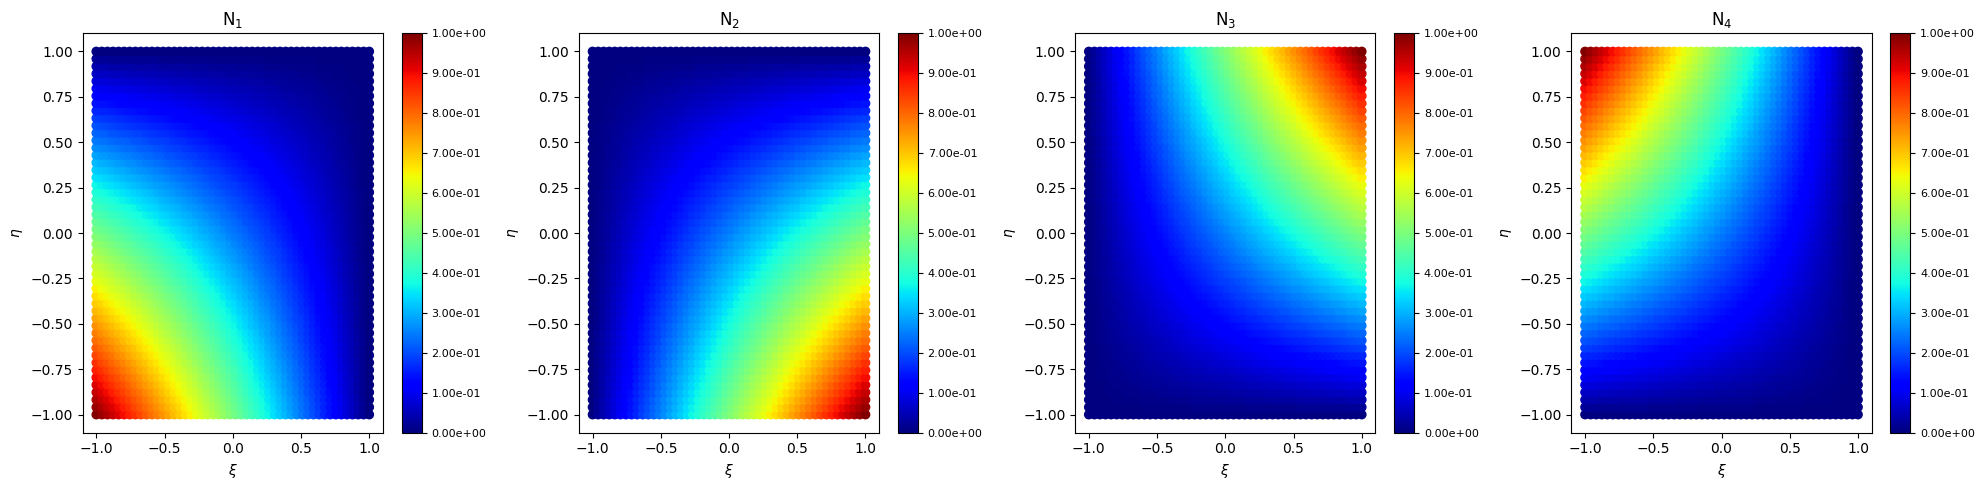

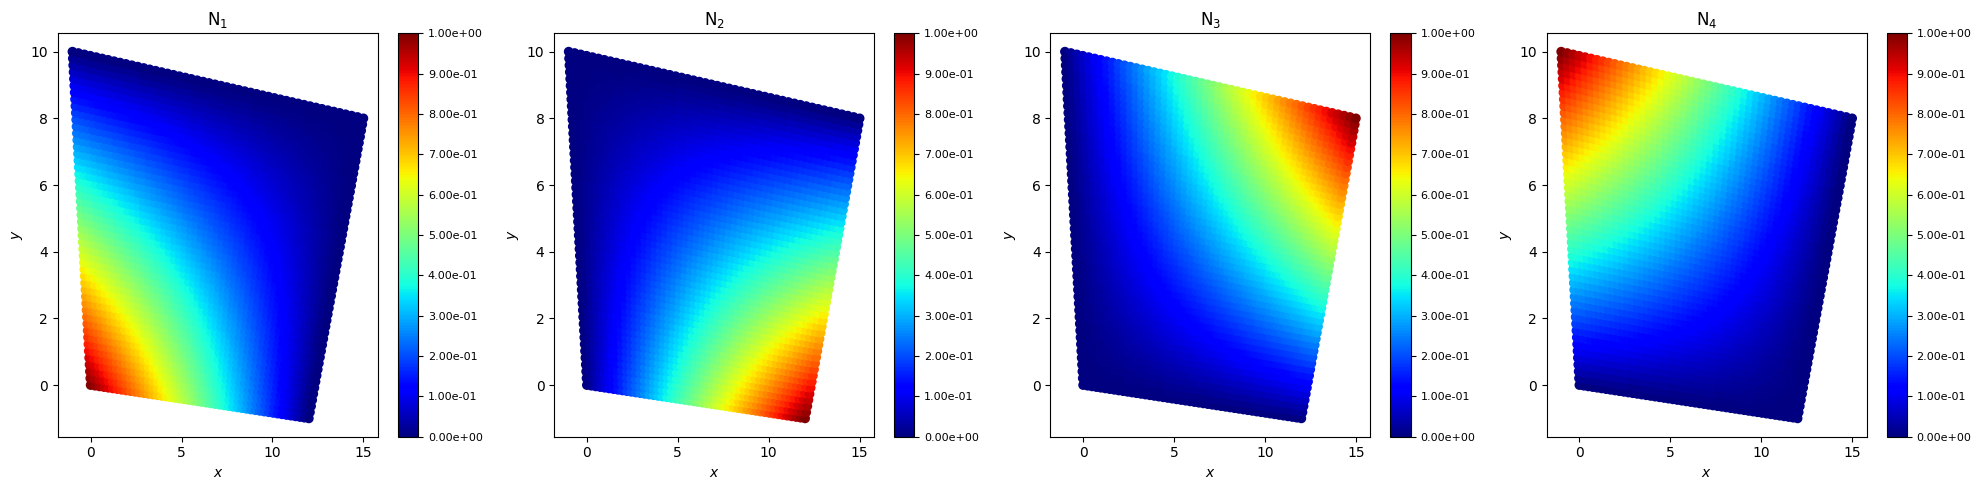

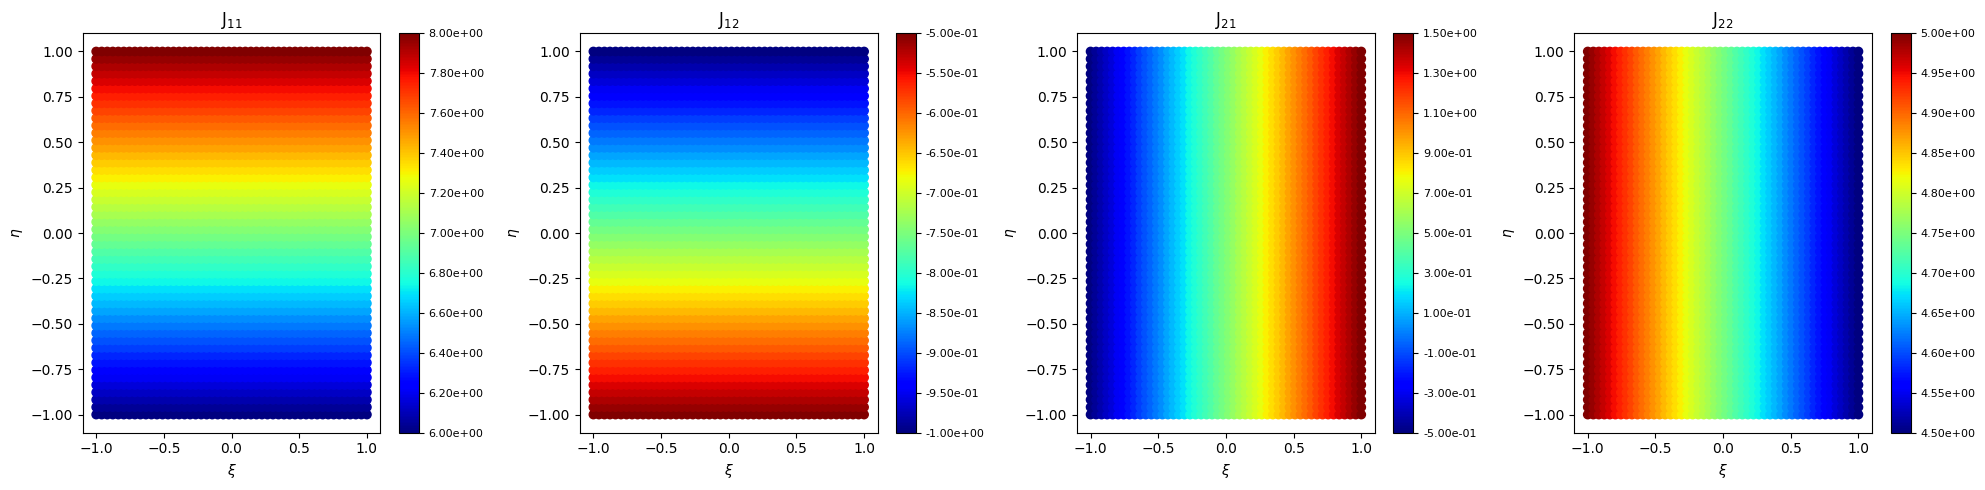

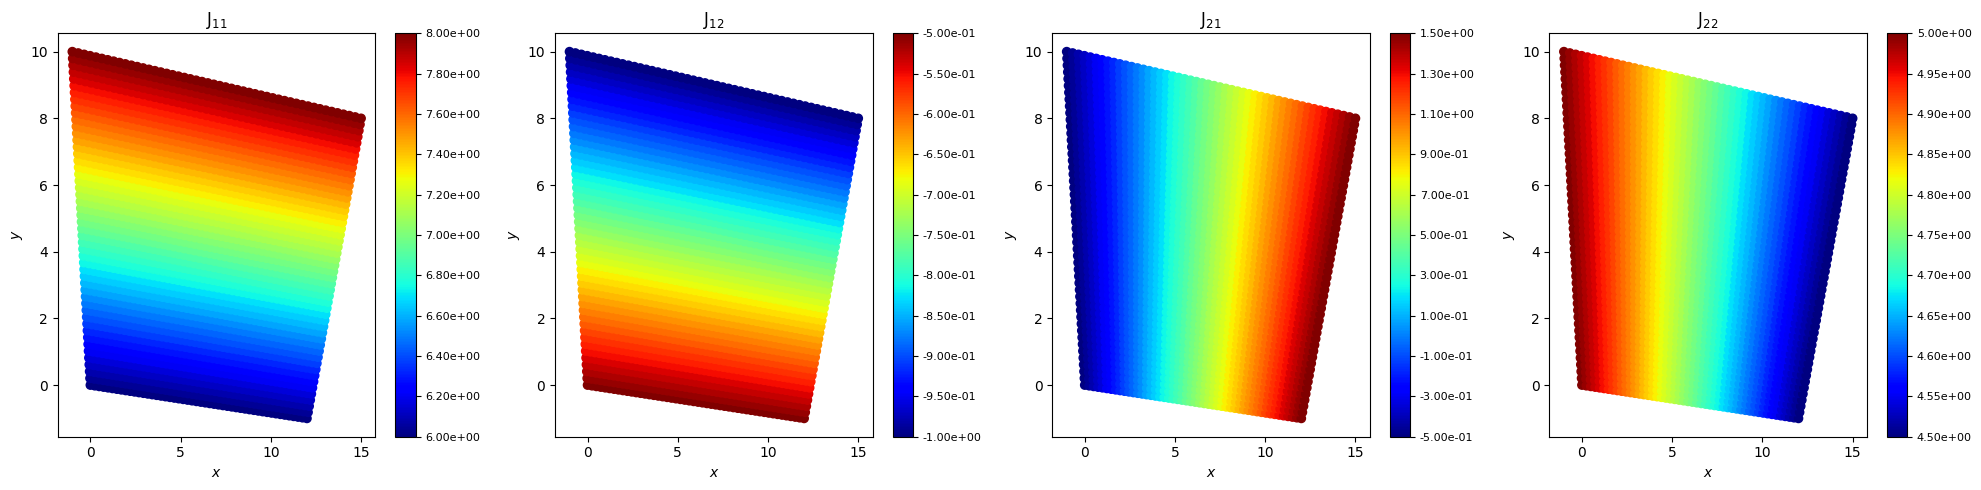

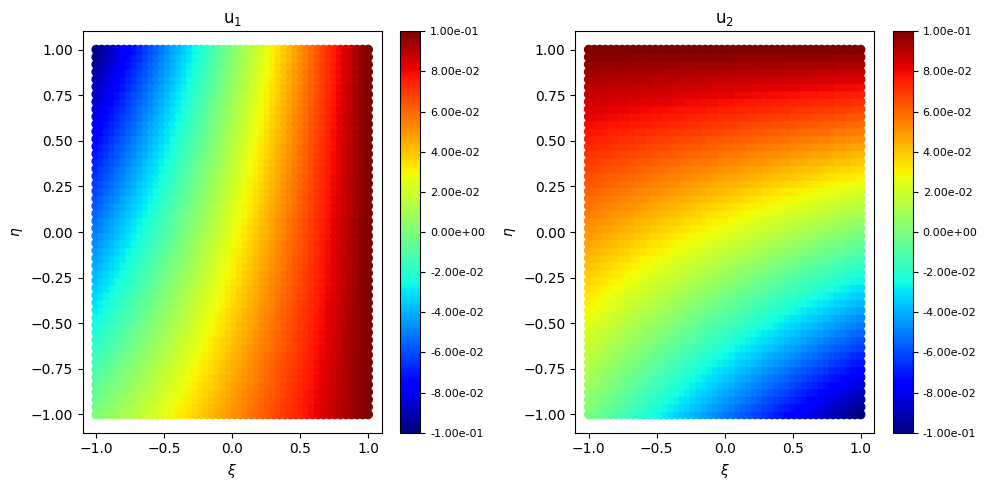

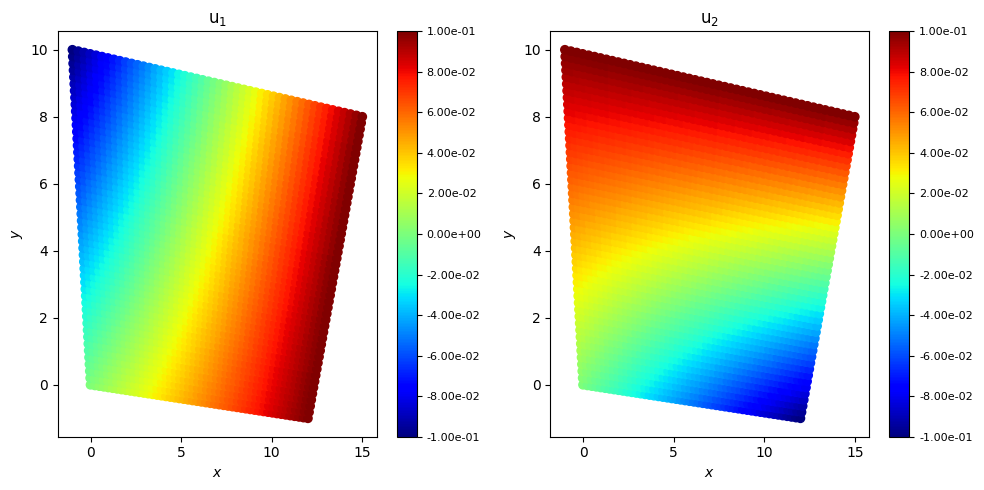

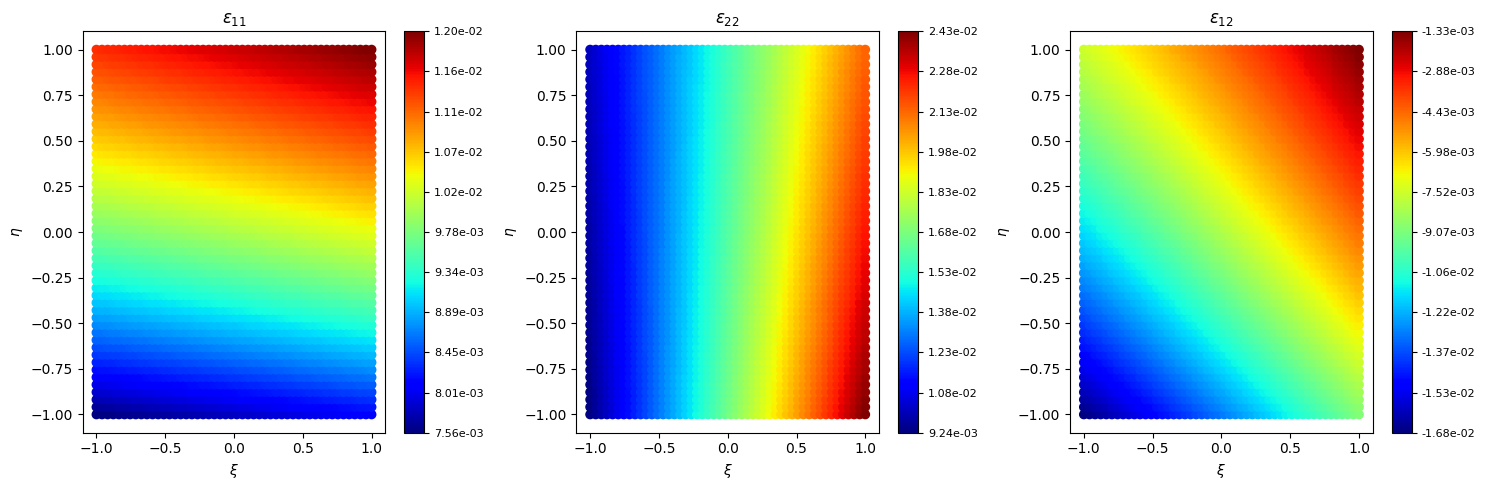

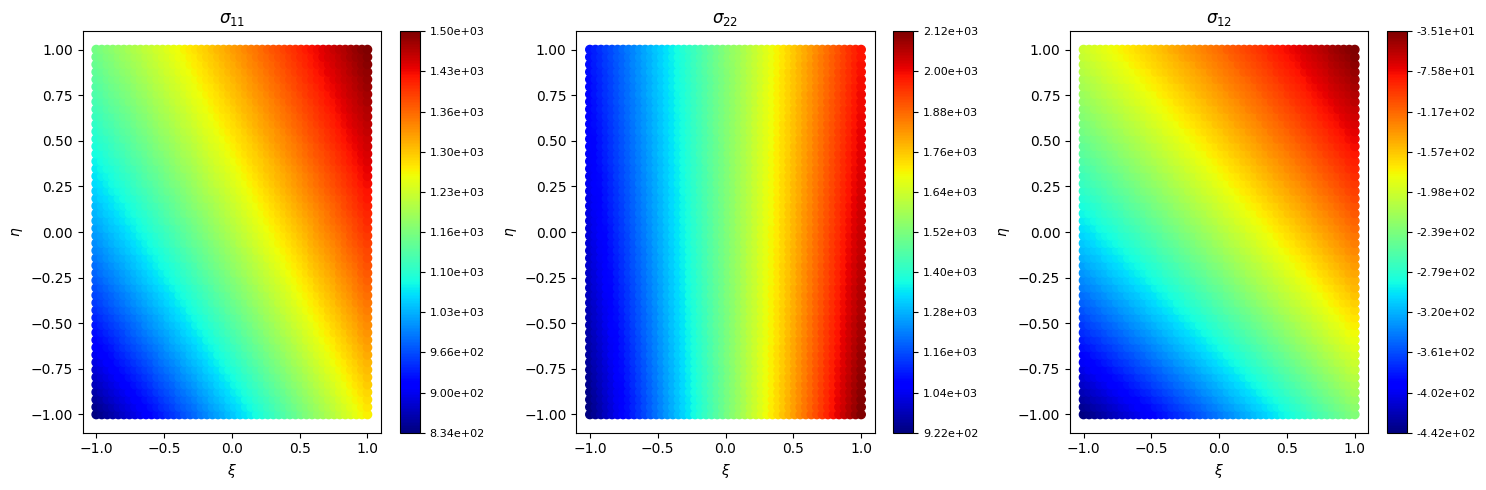

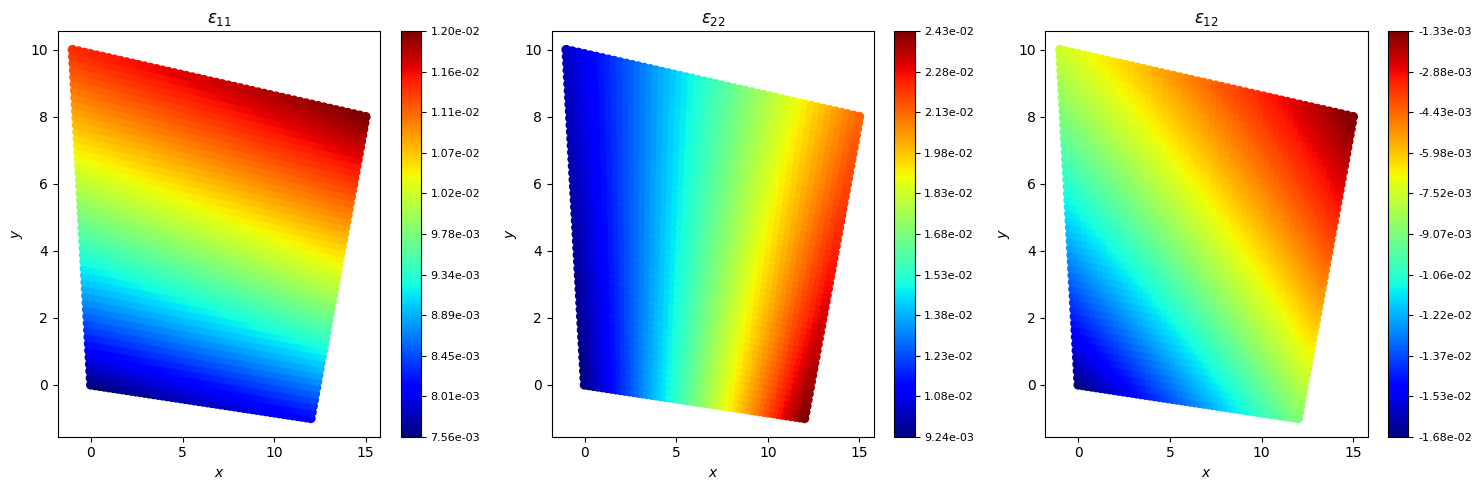

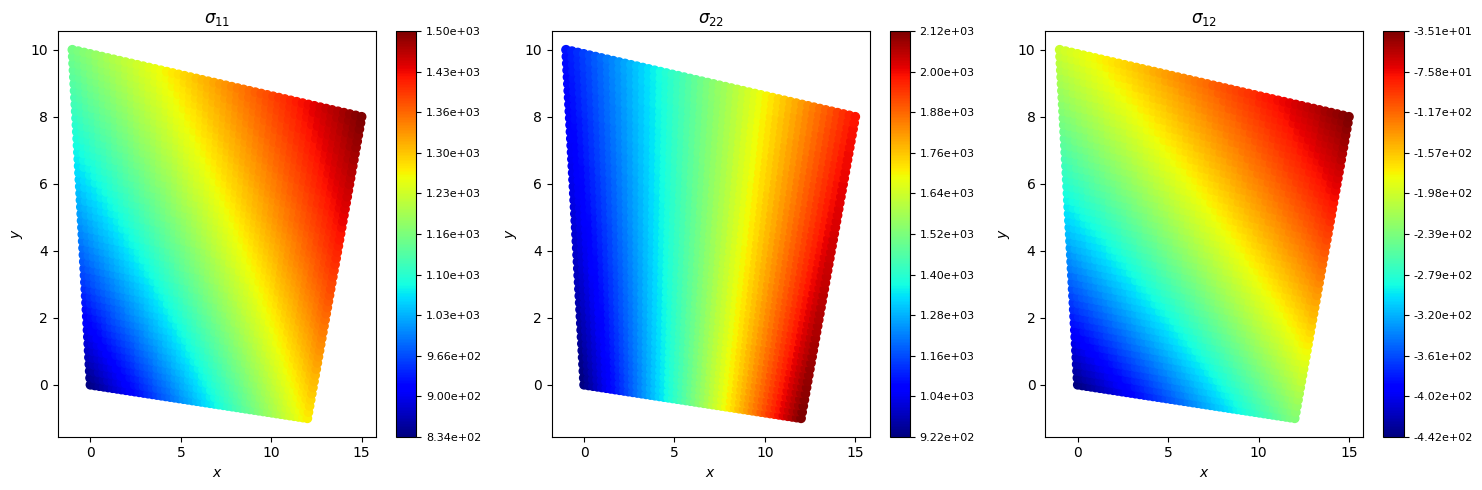

In [4]:
# Visual inspection of the element when using a plane stress formulation
mat = MATERIALS['aluminum']
D = mat.D_isotropic_plane_stress()
figs = mfe.tests.inspect_2D_element(elem, D, q)

#### 8-noded, 2D element

In [5]:
# Get element and run all tests
elem = ELEMENTS['quad']['elem']
q = ELEMENTS['quad']['q']
mfe.tests.test_2D_shape_functions(elem, NGRID)
mfe.tests.test_2D_shape_function_derivatives(elem, NGRID)
mfe.tests.test_2D_jacobian(elem, NGRID)
mfe.tests.test_2D_B_matrix(elem, NGRID)

*running test: 2D shape function (N) verification
-checking: shape of N matrix
-checking: sum of shape functions
-checking: N matrix zero-valued elements
-checking: N matrix components equivalence with corresponding nodal shape function
-checking: N matrix row equivalence
**test passed: shape function matrix (N)

*running test: 2D shape function derivative matrix (dN) verification
-checking: shape of dN matrix
-checking: sum of shape function derivatives
-checking: dN matrix zero-valued elements
-checking: dN matrix components equivalence with corresponding nodal shape function derivatives in each coordinate direction
-checking: dN matrix row equivalence
**test passed: 2D shape function derivative matrix (dN) verification

*running test: 2D full Jacobian matrix (J) verification
-checking: shape of full J matrix
-checking: upper left, lower right quadrant of full J matrix equivalence
-checking: upper right, lower left quadrant of full J matrix equivalence
-checking: upper right quadrant

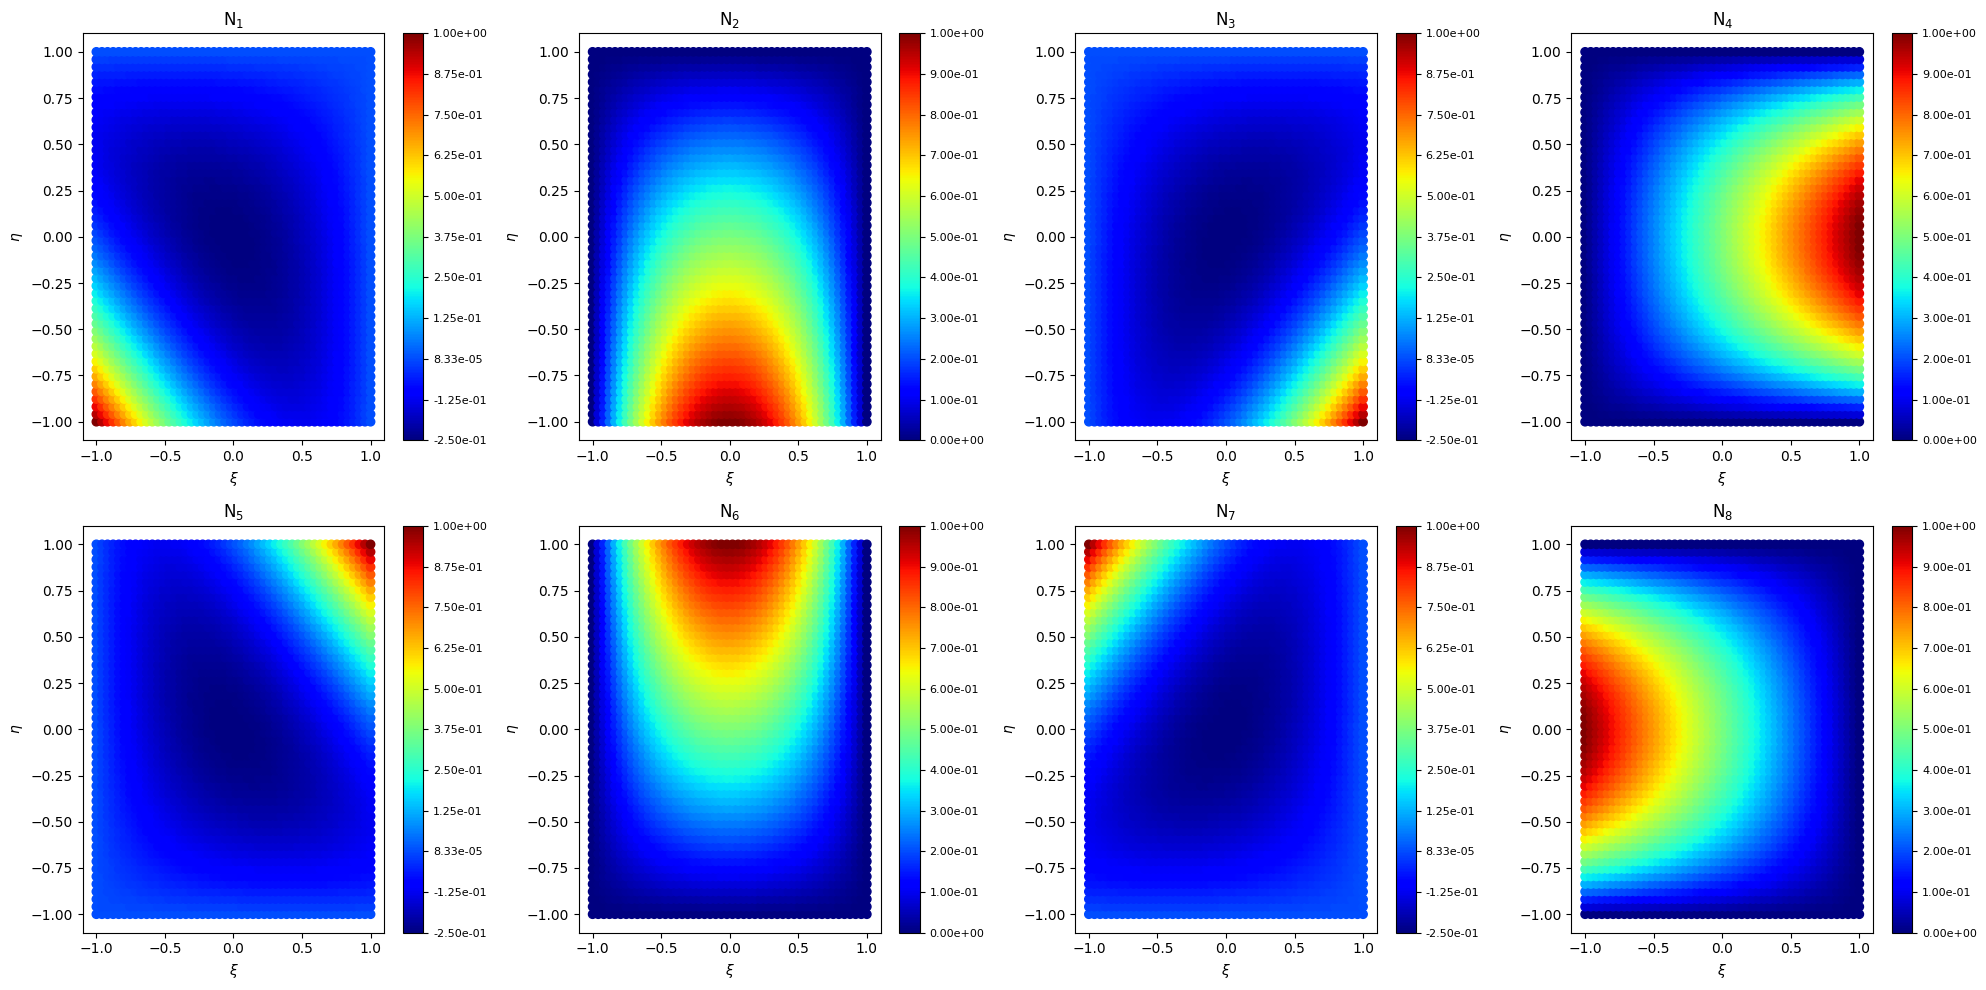

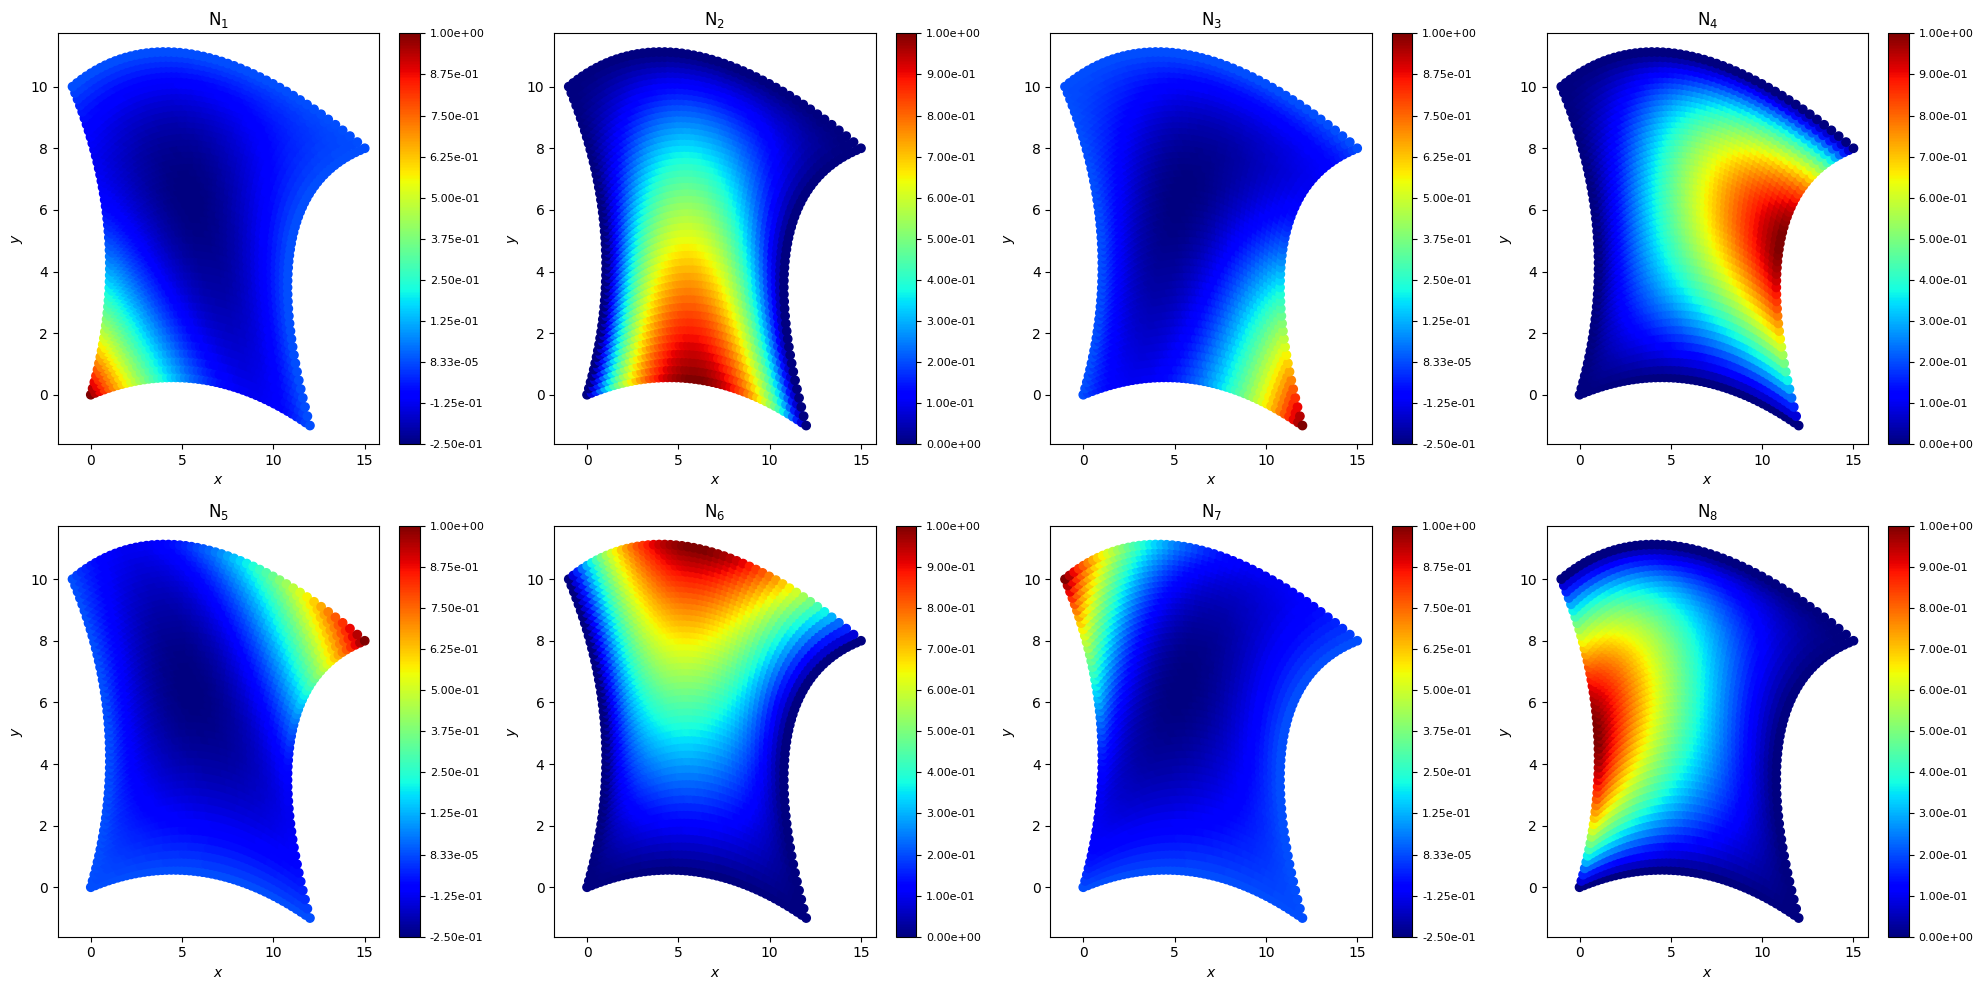

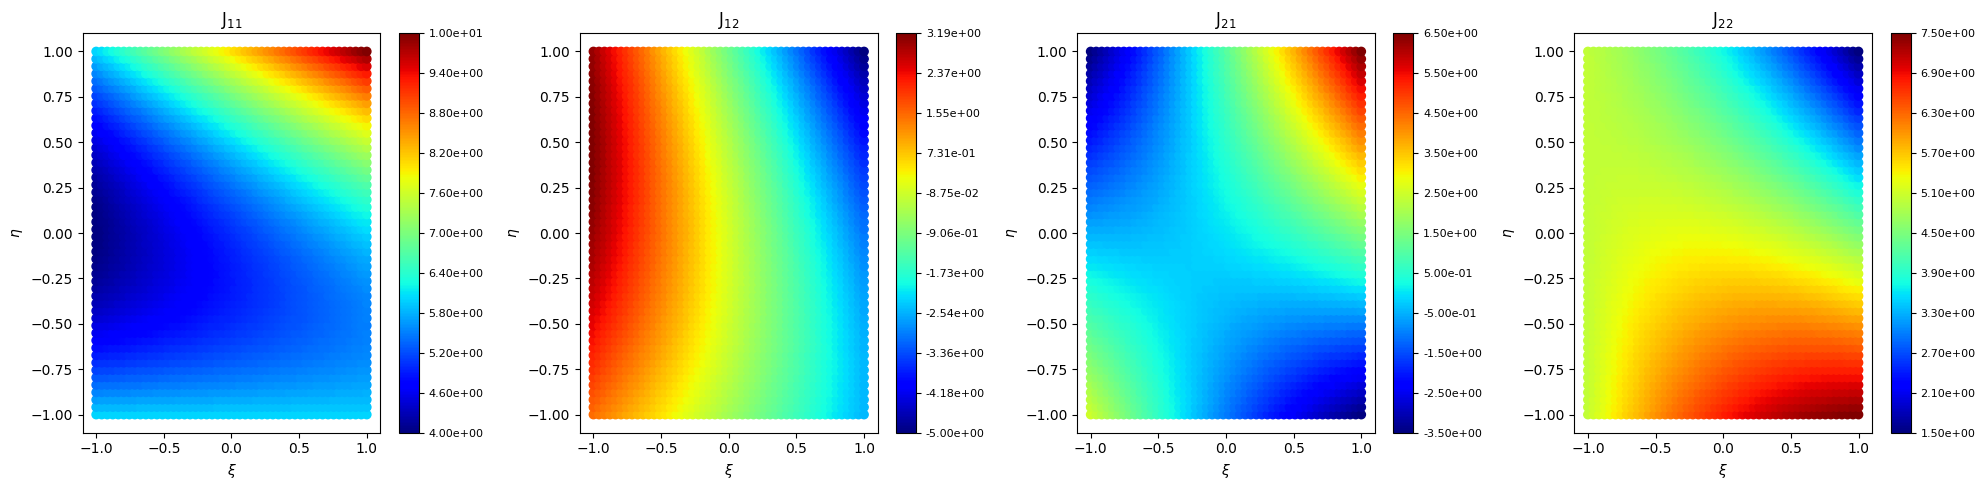

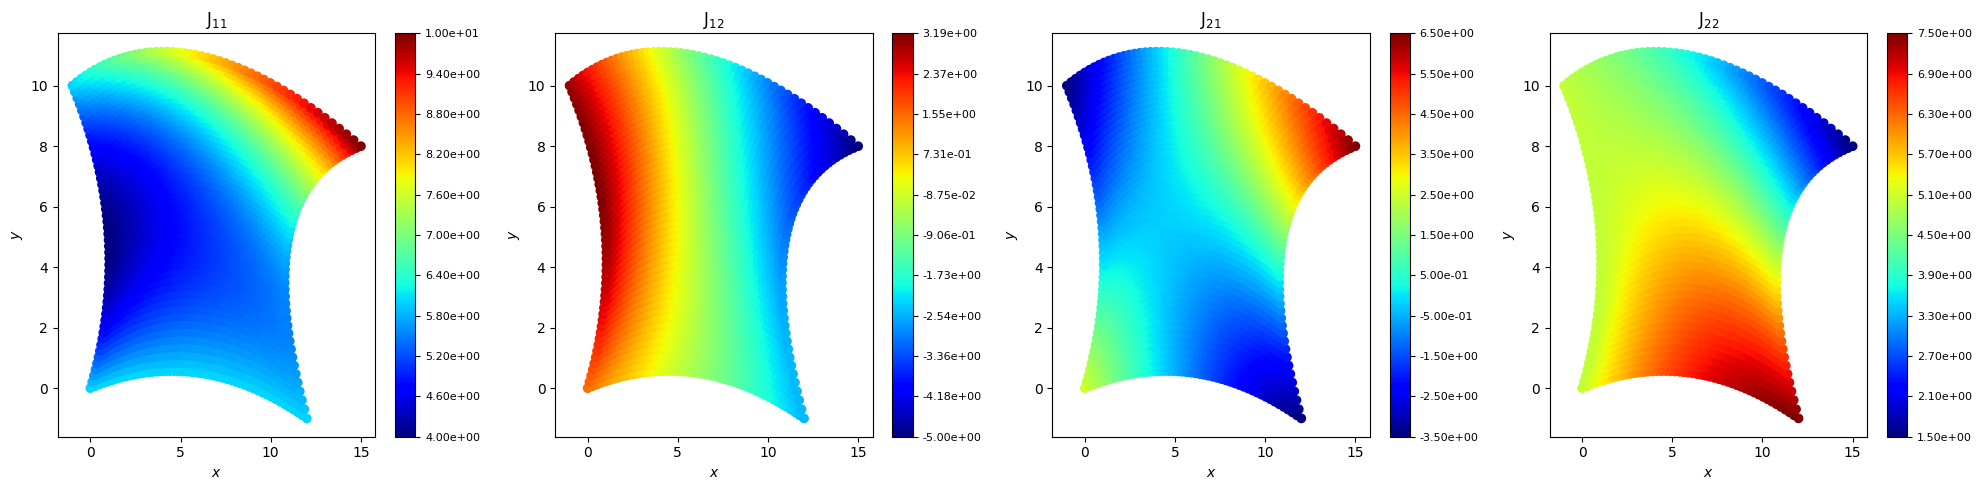

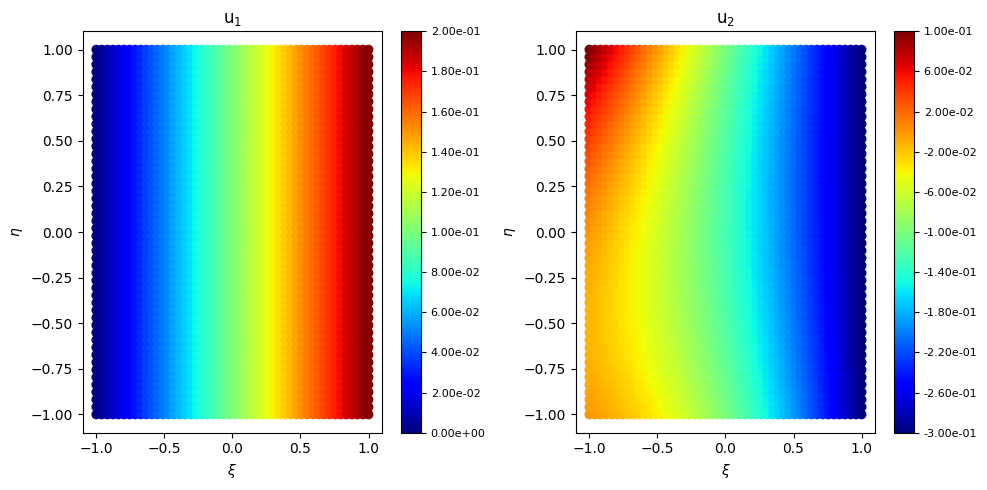

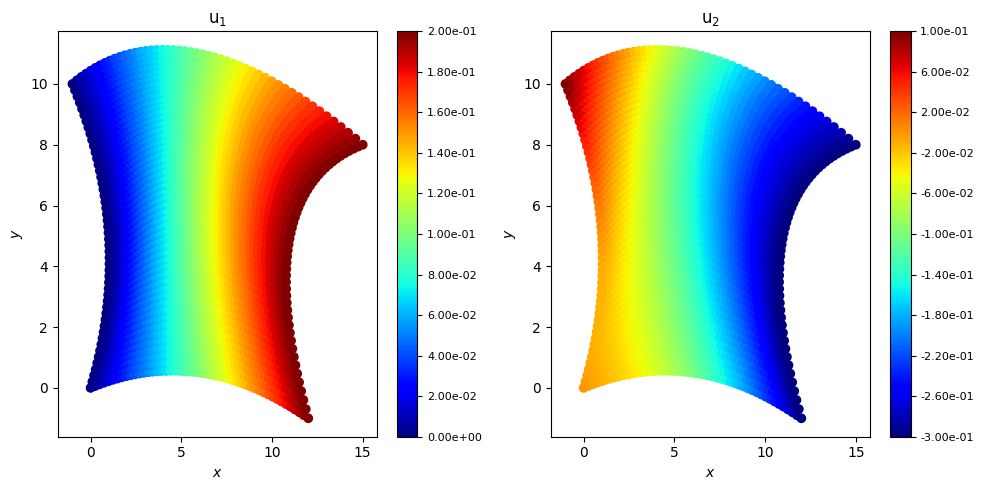

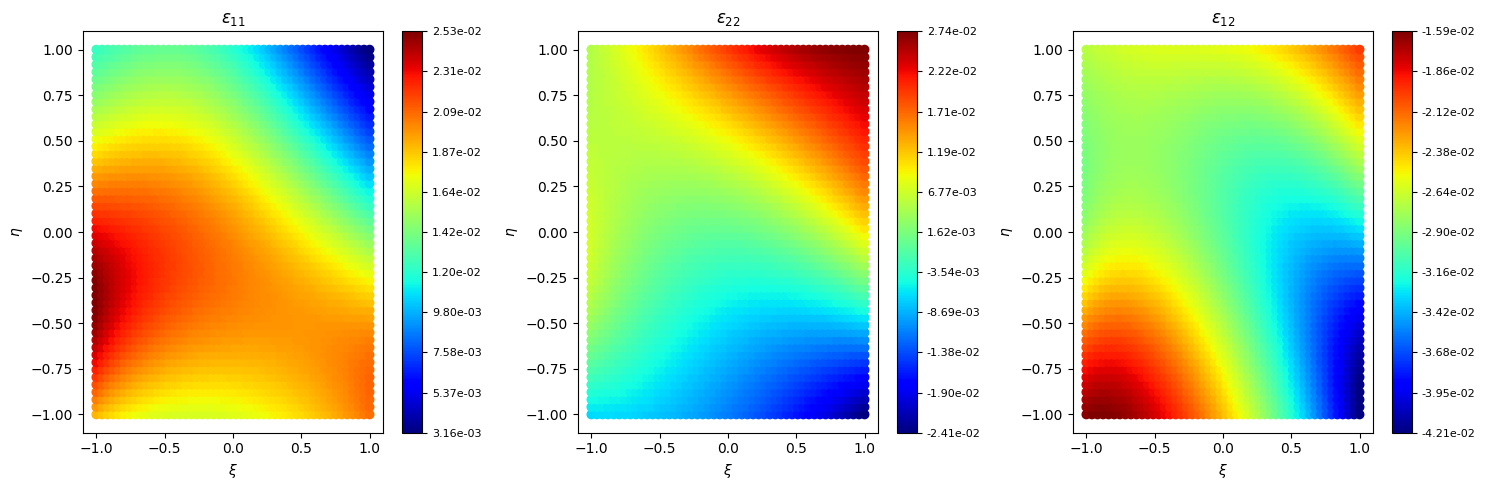

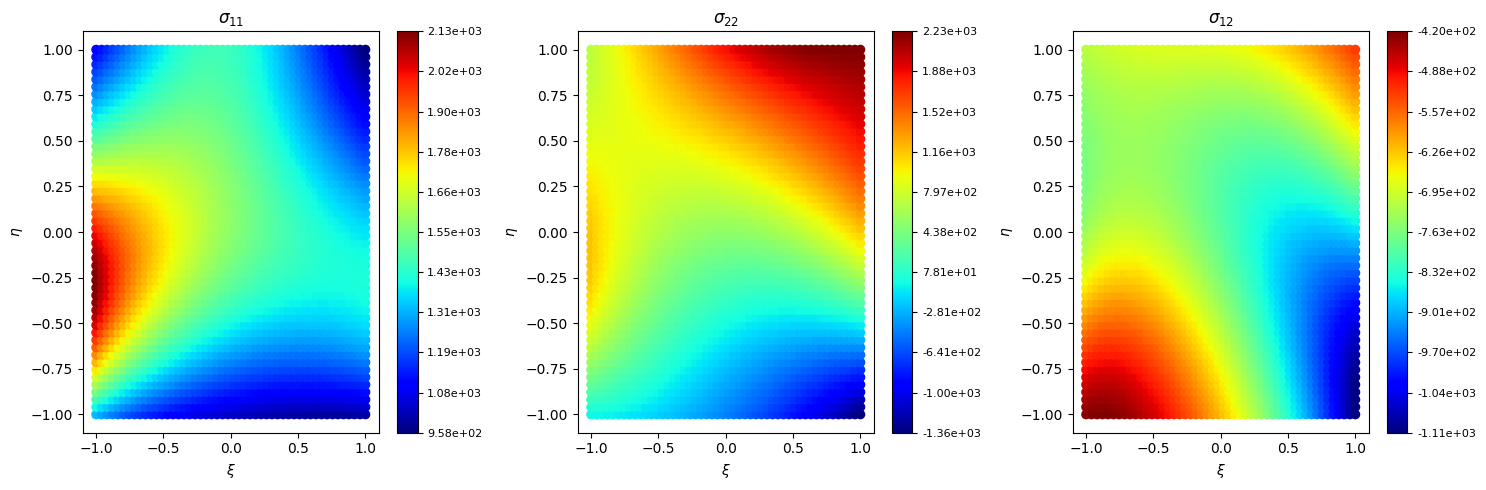

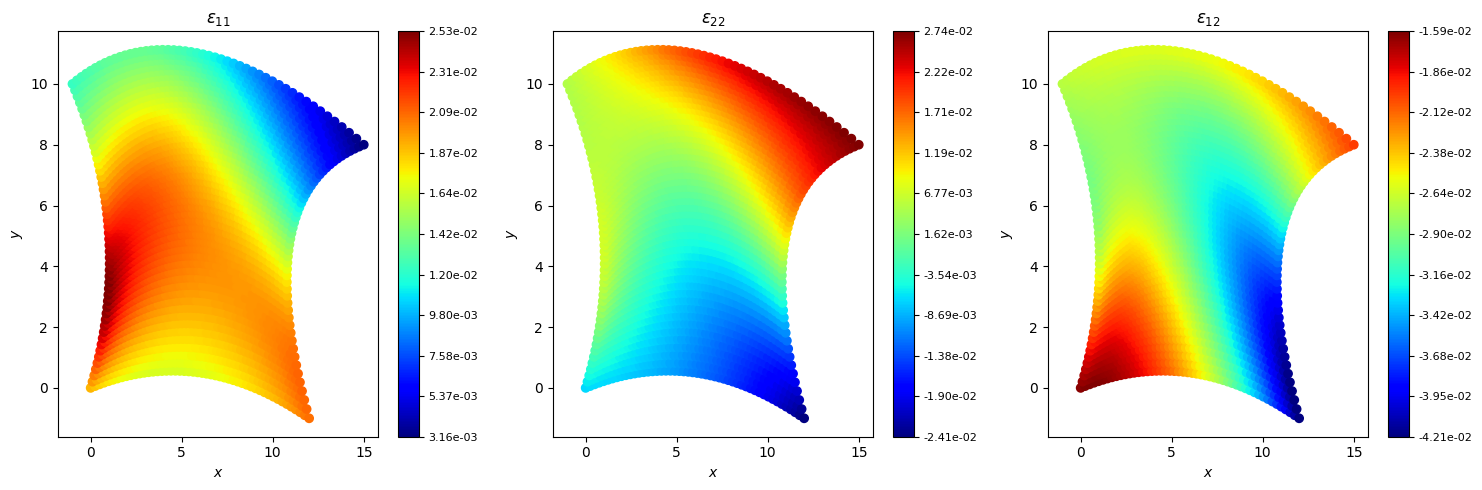

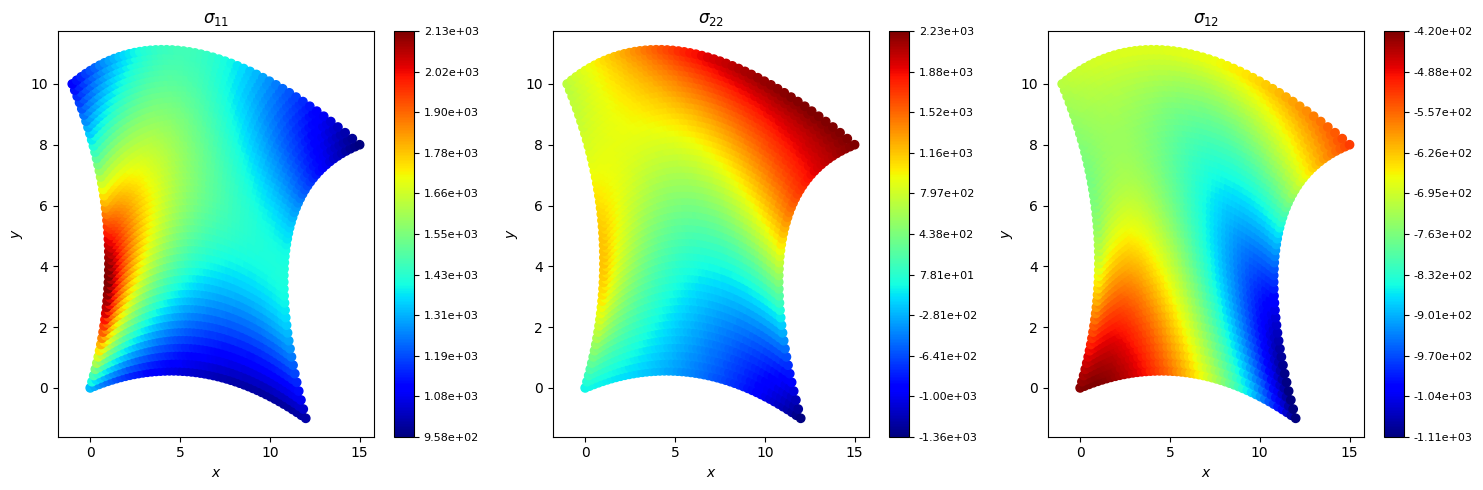

In [6]:
# Visual inspection of the element when using a plane stress formulation
mat = MATERIALS['aluminum']
D = mat.D_isotropic_plane_stress()
figs = mfe.tests.inspect_2D_element(elem, D, q)